In [13]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
RESULT_DIR = "UNetMini"
# RESULT_FILE = "20251121_163533_268_d02767e2.csv"
if not "RESULT_FILE" in globals():
    latest_file = sorted(os.listdir(RESULT_DIR))[-1]
    RESULT_PATH = os.path.join(RESULT_DIR, latest_file)
else:
    RESULT_PATH = os.path.join(RESULT_DIR, RESULT_FILE)  # type: ignore

In [ ]:
def plot_results(csv_path, save_path=None):
    df = pd.read_csv(csv_path)

    df["train_eval"] = df["train_eval"].apply(lambda x: x.replace(";", ","))
    df["train_eval"] = df["train_eval"].apply(ast.literal_eval)
    df["train_eval"] = df["train_eval"].apply(lambda x: np.mean(x))
    df["test_eval"] = df["test_eval"].apply(lambda x: x.replace(";", ","))
    df["test_eval"] = df["test_eval"].apply(ast.literal_eval)
    df["test_eval"] = df["test_eval"].apply(lambda x: np.mean(x))

    epochs = df["epoch"]
    train_loss = df["train_loss"]
    train_eval = df["train_eval"]
    test_loss = df["test_loss"]
    test_eval = df["test_eval"]

    df.head()

    fig, axes = plt.subplots(2, 2, figsize=(16, 9))

    # ==== (1,1) Train Loss ====
    axes[0, 0].plot(epochs, train_loss, marker="o")
    axes[0, 0].set_ylim(0, max(train_loss.max(), test_loss.max()) * 1.1)
    axes[0, 0].set_title("Train Loss")
    axes[0, 0].set_xlabel("Epoch")
    axes[0, 0].set_ylabel("Loss")
    axes[0, 0].grid(True)

    # ==== (1,2) Train Eval ====
    axes[0, 1].plot(epochs, train_eval, marker="o", color="tab:orange")
    axes[0, 1].set_ylim(0, 1)
    axes[0, 1].set_title("Train Eval")
    axes[0, 1].set_xlabel("Epoch")
    axes[0, 1].set_ylabel("Eval")
    axes[0, 1].grid(True)

    # ==== (2,1) Test Loss ====
    axes[1, 0].plot(epochs, test_loss, marker="o", color="tab:green")
    axes[1, 0].set_ylim(0, max(train_loss.max(), test_loss.max()) * 1.1)
    axes[1, 0].set_title("Test Loss")
    axes[1, 0].set_xlabel("Epoch")
    axes[1, 0].set_ylabel("Loss")
    axes[1, 0].grid(True)

    # ==== (2,2) Test Eval ====
    axes[1, 1].plot(epochs, test_eval, marker="o", color="tab:red")
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].set_title("Test Eval")
    axes[1, 1].set_xlabel("Epoch")
    axes[1, 1].set_ylabel("Eval")
    axes[1, 1].grid(True)

    best_test_eval_idx = test_eval.idxmax()
    best_test_eval = test_eval[best_test_eval_idx]
    fig.suptitle(
        f"Best Test Eval: {best_test_eval:.4f} at Epoch {epochs[best_test_eval_idx]}",
        fontsize=16,
    )

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=200)
    plt.show()

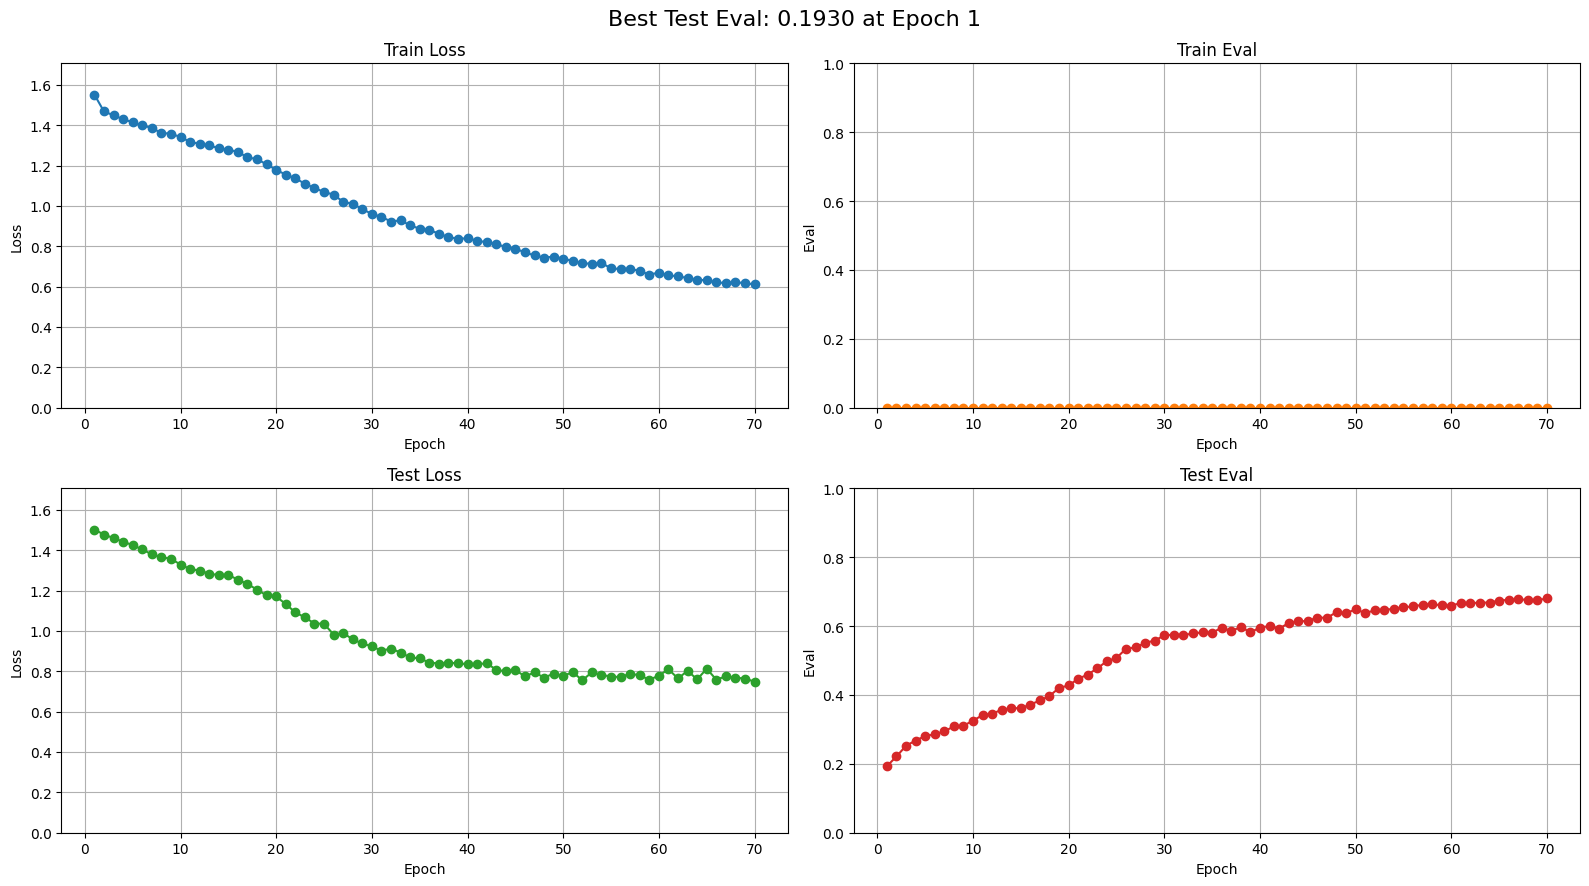

In [16]:
plot_results(RESULT_PATH)